In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
df = pd.DataFrame(pd.read_csv("BMA_tune_relu.txt", sep=" "))
#df=df[df['lengthscale']<=0.3]
# print the last column
print(df)

      lengthscale  l2regularizer  rmse_mean  rmse_std              pi_cov  \
0           0.125           0.85   3.332725  1.171225  0.9019607843137255   
1           0.200           0.20   2.745958  1.712905  0.9607843137254902   
2           0.150           0.20   2.363628  1.192726  0.8823529411764706   
3           0.125           0.65   2.833017  0.864108  0.9411764705882353   
4           0.125           0.35   3.087620  1.577995  0.8627450980392157   
...           ...            ...        ...       ...                 ...   
1415        0.340           0.50   1.881790  1.041172  0.9019607843137255   
1416        0.350           0.35   1.946860  1.250442  0.9411764705882353   
1417        0.375           0.10   1.981284  0.943867  0.9411764705882353   
1418        0.700           0.05   1.218437  0.499069  0.9411764705882353   
1419        0.875           0.70   1.039434  0.461858  0.9607843137254902   

      pi_sum  
0         46  
1         49  
2         45  
3         48  


In [18]:
order = pd.DataFrame(pd.read_csv("BMA_tune_relu.txt", sep=" "))
order = order.sort_values(by=['lengthscale', 'l2regularizer'])
order = order.reset_index(drop=True)
with open("BMA_tune_relu1.txt", 'a') as f:
    # separate each value with " "

    dfAsString = order.to_string(header=False, index=False) 
    print(dfAsString)
    f.write(dfAsString)
#order

5


In [22]:
#find the missing one
for i in np.unique(order['lengthscale']):
    print(i)
    print(df[df['lengthscale']==i].shape)
print(df[df['lengthscale']==0.25])

0.05
(20, 6)
0.075
(20, 6)
0.1
(20, 6)
0.125
(20, 6)
0.15
(20, 6)
0.175
(20, 6)
0.2
(20, 6)
0.205
(20, 6)
0.21
(20, 6)
0.215
(20, 6)
0.22
(20, 6)
0.225
(20, 6)
0.23
(20, 6)
0.235
(20, 6)
0.24
(20, 6)
0.245
(20, 6)
0.25
(20, 6)
0.255
(20, 6)
0.26
(20, 6)
0.265
(20, 6)
0.27
(20, 6)
0.275
(20, 6)
0.28
(20, 6)
0.285
(20, 6)
0.29
(20, 6)
0.295
(20, 6)
0.3
(20, 6)
0.305
(20, 6)
0.31
(20, 6)
0.315
(20, 6)
0.32
(20, 6)
0.325
(20, 6)
0.33
(20, 6)
0.335
(20, 6)
0.34
(20, 6)
0.345
(20, 6)
0.35
(20, 6)
0.355
(20, 6)
0.36
(20, 6)
0.365
(20, 6)
0.37
(20, 6)
0.375
(20, 6)
0.38
(20, 6)
0.385
(20, 6)
0.39
(20, 6)
0.395
(20, 6)
0.4
(20, 6)
0.425
(20, 6)
0.45
(20, 6)
0.475
(20, 6)
0.5
(20, 6)
0.525
(20, 6)
0.55
(20, 6)
0.575
(20, 6)
0.6
(20, 6)
0.625
(20, 6)
0.65
(20, 6)
0.675
(20, 6)
0.7
(20, 6)
0.725
(20, 6)
0.75
(20, 6)
0.775
(20, 6)
0.8
(20, 6)
0.825
(20, 6)
0.85
(20, 6)
0.875
(19, 6)
0.9
(20, 6)
0.925
(20, 6)
0.95
(20, 6)
0.975
(20, 6)
1.0
(20, 6)
     lengthscale  l2regularizer  rmse_mean  rmse_std

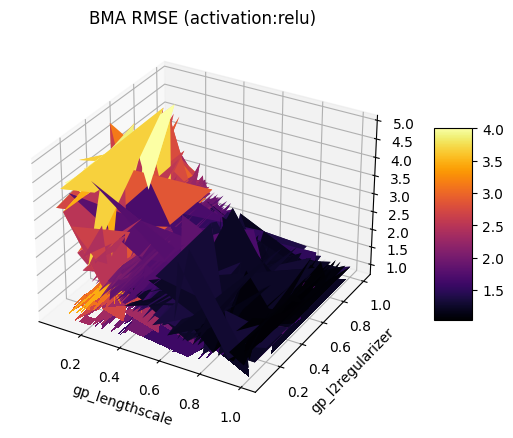

In [3]:
fig = plt.figure(figsize= (10,5))
rmse_mean_plot = df['rmse_mean'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_mean_plot, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE (activation:relu)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_mean_plot,
                zdir ='z',
                offset = 0.8,
                cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0.8, np.max(rmse_mean_plot))
# show plot
plt.show()

In [4]:
print(df[df['rmse_mean']==np.min(df['rmse_mean'])])
print(df[df['rmse_std']==np.min(df['rmse_std'])])

      lengthscale  l2regularizer  rmse_mean  rmse_std              pi_cov  \
1224          1.0            0.9   0.961892   0.44502  0.9411764705882353   

      pi_sum  
1224      48  
      lengthscale  l2regularizer  rmse_mean  rmse_std              pi_cov  \
1191         0.85            0.5   1.032369  0.322204  0.9607843137254902   

      pi_sum  
1191      49  


In [ ]:
rmse_std_plot = df['rmse_std'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
ax = plt.axes(projection='3d')
x_grid, y_grid = df['lengthscale'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer']))), df['l2regularizer'].values.reshape(len(np.unique(df['lengthscale'])), len(np.unique(df['l2regularizer'])))
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_std_plot, cmap='inferno', 
                       edgecolor ='none')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BMA RMSE std (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_std_plot,
                zdir ='z',
                 offset = 0,
                   cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0, np.max(rmse_std_plot))
# show plot
plt.show()

### BNE conservative sweep

In [ ]:
def readbnetxt():
    data = []
    with open('rmse_bne1.txt', 'r') as f:
        for line in f.readlines():
            line = line.strip('\n')
            line = line.split()
            data.append(line)
    #print(data)
    return data
df1 = readbnetxt()
# transfer list to dataframe
df1 = pd.DataFrame(df1[1:], columns=df1[0])
df1

In [ ]:
fig = plt.figure(figsize= (10,5))
rmse_bma_mean = order['rmse_bma_mean'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
#rmse_mean_plot = rmse_mean_plot.astype(np.float64)
ax = plt.axes(projection='3d')
x_grid, y_grid = order['lengthscale'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer']))), order['l2regularizer'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
# change the type of x_grid and y_grid to float
#x_grid, y_grid = x_grid.astype(np.float64), y_grid.astype(np.float64)
surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_bma_mean, cmap='inferno', 
                       edgecolor ='none')


fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
ax.set_title('BNE RMSE (activation:cosine)')
ax.set_xlabel('gp_lengthscale')
ax.set_ylabel('gp_l2regularizer')
 
cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_bma_mean,
                zdir ='z',
                offset = 0.8,
                cmap = 'inferno')
# #cset = ax.contourf(x, y, z,
#                    zdir ='x',
#                    offset =-5,
#                    cmap = my_cmap)
# #cset = ax.contourf(x, y, z,
#                    zdir ='y',
#                    offset = 5,
#                    cmap = my_cmap)

ax.set_zlim(0.9, 0.92)
# show plot
plt.show()

In [ ]:
# plot rmse_bma_mean, rmse_bma, rmse_bae, rmse_bne_vo, rmse_bne_vs 

rmse_bma_mean = order['rmse_bma_mean'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bma = order['rmse_bma'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bae = order['rmse_bae'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bne_vo = order['rmse_bne_vo'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
rmse_bne_vs = order['rmse_bne_vs'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))
#rmse_mean_plot = rmse_mean_plot.astype(np.float64)

x_grid, y_grid = order['lengthscale'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer']))), order['l2regularizer'].values.reshape(len(np.unique(order['lengthscale'])), len(np.unique(order['l2regularizer'])))

for rmse_name in [rmse_bma_mean, rmse_bma, rmse_bae, rmse_bne_vo, rmse_bne_vs]:
    fig = plt.figure(figsize= (10,5))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X=x_grid, Y=y_grid, Z=rmse_name, cmap='inferno', 
                       edgecolor ='none')
    fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
    #ax.set_title()
    ax.set_xlabel('gp_lengthscale')
    ax.set_ylabel('gp_l2regularizer')
 
    cset = ax.contourf(X=x_grid, Y=y_grid, Z=rmse_name,
                zdir ='z',
                offset = np.min(rmse_name)-0.02,
                cmap = 'inferno')
    # #cset = ax.contourf(x, y, z,
    #                    zdir ='x',
    #                    offset =-5,
    #                    cmap = my_cmap)
    # #cset = ax.contourf(x, y, z,
    #                    zdir ='y',
    #                    offset = 5,
    #                    cmap = my_cmap)

    ax.set_zlim(np.min(rmse_name)-0.02, np.max(rmse_name)+0.02)
    # show plot
plt.show()            
